# ---------- Data Cleaning  ---------

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway, spearmanr
from sqlalchemy import create_engine

In [3]:
df = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\Capstone_Project\amazon_products.csv")

In [4]:
df. head()

,Name,Price,Category,Rating,Reviews
0,Puma Sports,7548,shoes,4.5,46012
1,Dell Inspiron,140139,laptops,4.8,23866
2,Fastrack Analog,4177,watches,3.4,17958
3,Lenovo ThinkPad,106911,laptops,4.2,47920
4,Apple iPad,57843,tablets,3.7,44463


In [5]:
df.tail()

,Name,Price,Category,Rating,Reviews
1495,Acer Aspire,82819,computers,4.0,49872
1496,Dell Desktop,58839,computers,4.3,29663
1497,Samsung Galaxy,34532,mobile phones,3.8,15534
1498,Amazon Fire,41721,tablets,4.5,2201
1499,Apple iPad,31573,tablets,4.0,38264


In [6]:
df.shape

(1500, 5)

In [7]:
df.isnull().sum()

Name        0
Price       0
Category    0
Rating      0
Reviews     0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.replace("Unknown", np.nan, inplace=True)


In [10]:
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")

df["Rating"].fillna(df["Rating"].mean(), inplace=True)    
df["Reviews"].fillna(0, inplace=True) 

In [11]:
df.Category.value_counts()

Category
tablets          224
mobile phones    206
books            195
computers        185
shoes            182
laptops          179
watches          171
headphones       158
Name: count, dtype: int64

In [12]:
df.to_csv("amazon_products.csv", index=False)

print("File saved successfully as 'amazon_products.csv'")

File saved successfully as 'amazon_products.csv'


In [14]:
df.dtypes


Name         object
Price         int64
Category     object
Rating      float64
Reviews       int64
dtype: object

In [13]:
df.describe()


,Price,Rating,Reviews
count,1500.000000,1500.000000,1500.000000
mean,32342.537333,4.010133,24887.005333
std,35586.666863,0.578343,14350.931842
min,200.000000,3.000000,39.000000
25%,3393.500000,3.500000,13035.500000
50%,14778.500000,4.000000,24733.500000
75%,53139.750000,4.500000,37362.250000
max,149478.000000,5.000000,50000.000000


In [14]:
df.describe(include ='all')

,Name,Price,Category,Rating,Reviews
count,1500,1500.000000,1500,1500.000000,1500.000000
unique,32,NaN,8,NaN,NaN
top,OnePlus Nord,NaN,tablets,NaN,NaN
freq,65,NaN,224,NaN,NaN
mean,NaN,32342.537333,NaN,4.010133,24887.005333
std,NaN,35586.666863,NaN,0.578343,14350.931842
min,NaN,200.000000,NaN,3.000000,39.000000
25%,NaN,3393.500000,NaN,3.500000,13035.500000
50%,NaN,14778.500000,NaN,4.000000,24733.500000
75%,NaN,53139.750000,NaN,4.500000,37362.250000


c:\Users\Asus\.anaconda\jupyter notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\.anaconda\jupyter notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


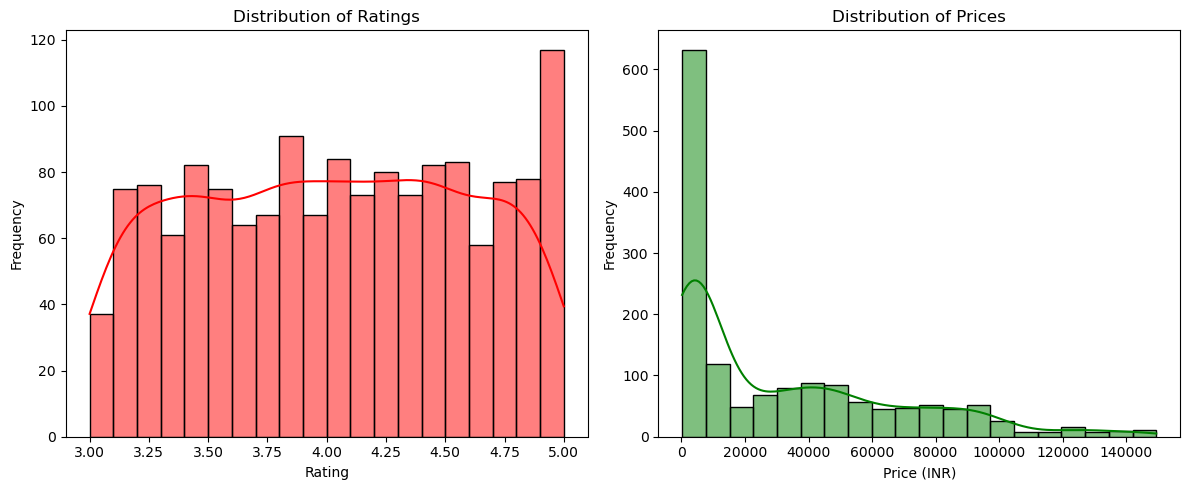

In [16]:
# Set up the figure
plt.figure(figsize=(12, 5))

# Histogram for Ratings
plt.subplot(1, 2, 1)
sns.histplot(df["Rating"].dropna(), bins=20, kde=True, color="red")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

# Histogram for Prices
plt.subplot(1, 2, 2)
sns.histplot(df["Price"].dropna(), bins=20, kde=True, color="green")
plt.title("Distribution of Prices")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# ---------- Outlier Detection  ---------

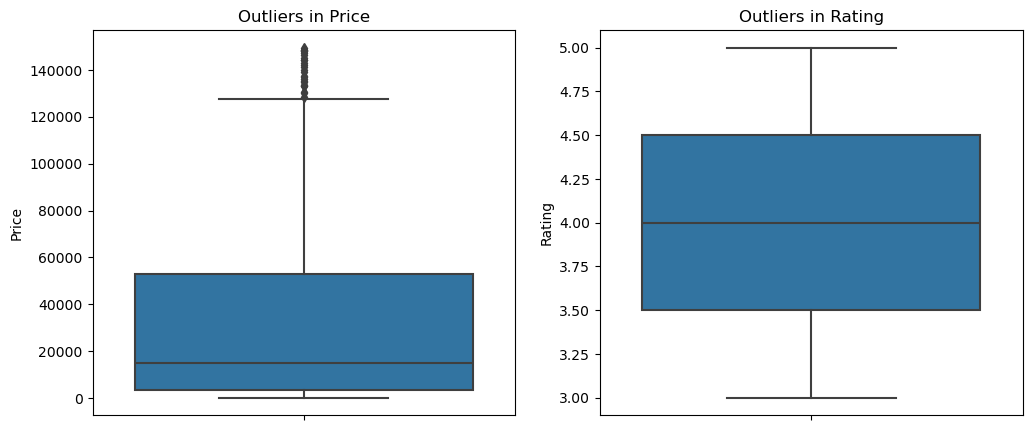

In [17]:
plt.figure(figsize=(12, 5))

# Boxplot for Price
plt.subplot(1, 2, 1)
sns.boxplot(y=df["Price"])
plt.title("Outliers in Price")

# Boxplot for Rating
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Rating"])
plt.title("Outliers in Rating")

plt.show()

# ---------- Correlation Analysis ---------

In [18]:
corr, _ = spearmanr(df["Price"], df["Rating"])
print(f"Spearman Correlation between Price and Rating: {corr:.3f}")

Spearman Correlation between Price and Rating: -0.017


# ----------  Statistical Analysis ---------

## Chi-Square Test 

In [19]:
df["Rating_Category"] = pd.cut(df["Rating"], bins=[0, 3, 4, 5], labels=["Low", "Medium", "High"])

# Create contingency table
contingency_table = pd.crosstab(df["Category"], df["Rating_Category"])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject Null Hypothesis: Category affects rating distribution")
else:
    print("Fail to Reject Null Hypothesis: No strong evidence that category affects ratings")

Chi-Square Test p-value: 0.3440
Fail to Reject Null Hypothesis: No strong evidence that category affects ratings


### ----------  ANOVA Test ----------

In [20]:
categories = [df[df["Category"] == cat]["Rating"] for cat in df["Category"].unique()]
anova_stat, p_value = f_oneway(*categories)

print(f"ANOVA Test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject Null Hypothesis: Different product categories have significantly different average ratings")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in ratings across categories")

ANOVA Test p-value: 0.1961
Fail to Reject Null Hypothesis: No significant difference in ratings across categories


# Chi-Square Test (Categorical Analysis)

## Checks if different categories have different rating distributions.

### If p < 0.05, category affects rating.


# ANOVA (Comparing Multiple Groups)

## Compares average ratings across all categories.

### If p < 0.05, categories have different ratings.

# Storing Cleaned Data in MySQL Database

In [21]:
!pip install sqlalchemy mysql-connector-python


In [26]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# MySQL credentials
USERNAME = "root"
PASSWORD = quote_plus("@SQL_password09")  # encodes special characters
HOST = "localhost"
PORT = "3306"
DATABASE = "amazon_db"

# Safe connection string
connection_string = f"mysql+mysqlconnector://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"
engine = create_engine(connection_string)

# Verify connection
try:
    with engine.connect() as connection:
        print("Connected to MySQL Database successfully!")
except Exception as e:
    print(f"Error: {e}")


Error: (mysql.connector.errors.ProgrammingError) 1049 (42000): Unknown database 'amazon_db'
(Background on this error at: https://sqlalche.me/e/20/f405)
